<a href="https://colab.research.google.com/github/KatherinaG4/repositorio/blob/main/TFP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir arañuelaroja
!mkdir dichelops
!mkdir picu
!mkdir spoFrugi

In [ ]:
%cd /content/arañuelaroja
!unzip roja.zip
%cd ..

%cd /content/dichelops
!unzip dichelops.zip
%cd ..

%cd /content/picu
!unzip picudo.zip
%cd ..

%cd /content/spoFrugi
!unzip spo.zip
%cd ..

/content/arañuelaroja
Archive:  roja.zip
  inflating: araдuelaRoja/4_320_arana_roja_cultivos_melon_y_sandia.jpg  
  inflating: araдuelaRoja/4883543313_3470ed1b84_z.jpg  
  inflating: araдuelaRoja/acaro-rojo.jpg  
  inflating: araдuelaRoja/araC3B1aroja.jpg  
  inflating: araдuelaRoja/araC3B1a-roja-en-tomate.jpeg  
  inflating: araдuelaRoja/araC3B1a-roja-microscopio.jpg  
  inflating: araдuelaRoja/araC3B1a-roja-viC3B1a.jpg  
  inflating: araдuelaRoja/araC3B1uela2.jpg  
  inflating: araдuelaRoja/AraC3B1uela-roja_Tetranychus-urticae1.jpg  
  inflating: araдuelaRoja/AraC3B1uela-roja-Soja.jpg  
  inflating: araдuelaRoja/arana.png  
  inflating: araдuelaRoja/arana_roja.jpg  
  inflating: araдuelaRoja/arana-roja2.jpg  
  inflating: araдuelaRoja/arana-roja3.jpg  
  inflating: araдuelaRoja/arana-roja-plaga.jpg  
  inflating: araдuelaRoja/aranita-roja-2.jpg  
  inflating: araдuelaRoja/aranuela.png  
 extracting: araдuelaRoja/aranuela_roja_casa.webp  
  inflating: araдuelaRoja/CC3B3mo-tratar-la-ar

In [ ]:
!rm -rf /content/arañuelaroja/roja.zip
!rm -rf /content/dichelops/dichelops.zip
!rm -rf /content/picu/picudo.zip
!rm -rf /content/spoFrugi/spo.zip

In [ ]:
#Mostrar cuantas imagenes tiene cada categoria
!ls  /content/arañuelaroja/araдuelaRoja | wc -l #60
!ls /content/dichelops/Dichelops | wc -l #136
!ls /content/picu/PicudoAlgodonero | wc -l #70
!ls /content/spoFrugi/SpodopteraFrugiperda | wc -l #135

60
136
70
135


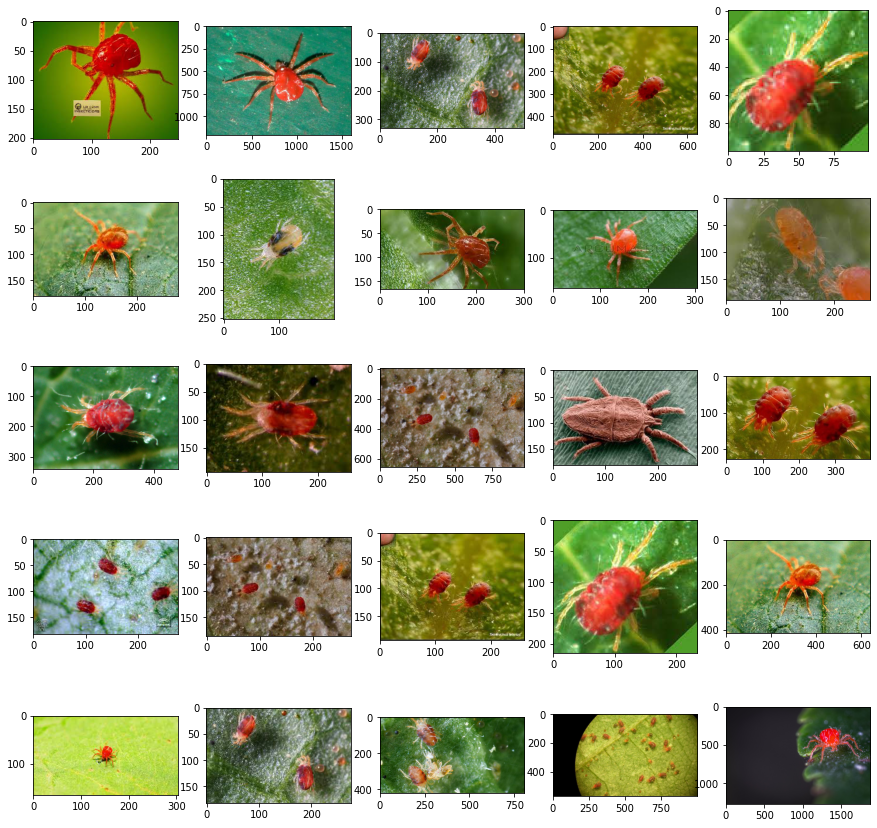

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/arañuelaroja/araдuelaRoja'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/arañuela
!mkdir dataset/dichelops
!mkdir dataset/picu
!mkdir dataset/spodoptera

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 60 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/arañuelaroja/araдuelaRoja'
carpeta_destino = '/content/dataset/arañuela'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 60:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 60 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/dichelops/Dichelops'
carpeta_destino = '/content/dataset/dichelops'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 60:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 60 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/picu/PicudoAlgodonero'
carpeta_destino = '/content/dataset/picu'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 60:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 60 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/spoFrugi/SpodopteraFrugiperda'
carpeta_destino = '/content/dataset/spodoptera'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 60:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls  /content/dataset/spodoptera | wc -l #60
!ls /content/dataset/arañuela | wc -l #60
!ls /content/dataset/dichelops | wc -l #60
!ls /content/dataset/picu | wc -l #60

60
60
60
60


Found 192 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


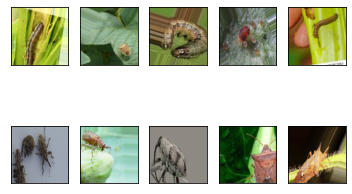

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
#normalizar las imagenes para que todos los datos del set sean entre 0 y 1
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% de datos de entrenamiento
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Preparar el modelo para ser entrenado
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
7/7 [==============================] - 11s 1s/step - loss: 1.6489 - accuracy: 0.2500 - val_loss: 1.2180 - val_accuracy: 0.5652
Epoch 2/50
7/7 [==============================] - 7s 938ms/step - loss: 1.0832 - accuracy: 0.5781 - val_loss: 0.7513 - val_accuracy: 0.7174
Epoch 3/50
7/7 [==============================] - 7s 953ms/step - loss: 0.6860 - accuracy: 0.7760 - val_loss: 0.6770 - val_accuracy: 0.8261
Epoch 4/50
7/7 [==============================] - 7s 946ms/step - loss: 0.4947 - accuracy: 0.8646 - val_loss: 0.4412 - val_accuracy: 0.8696
Epoch 5/50
7/7 [==============================] - 7s 933ms/step - loss: 0.3906 - accuracy: 0.8750 - val_loss: 0.4168 - val_accuracy: 0.8913
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.3043 - accuracy: 0.9219 - val_loss: 0.2326 - val_accuracy: 0.9348
Epoch 7/50
7/7 [==============================] - 7s 951ms/step - loss: 0.2511 - accuracy: 0.9635 - val_loss: 0.3659 - val_accuracy: 0.8478
Epoch 8/50
7/7 [=========

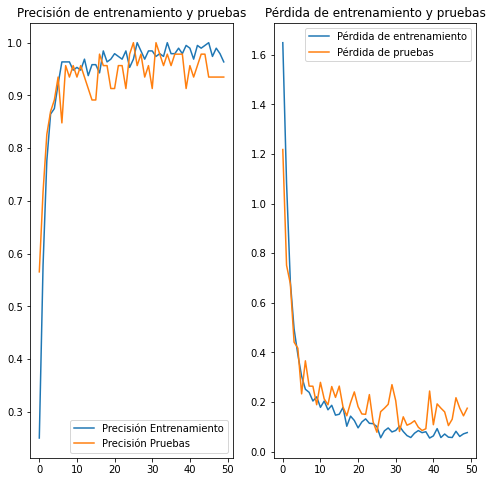

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
#Pillow es una biblioteca
from PIL import Image
import requests
from io import BytesIO
#cv2 es una librería para visión artificial de código abierto
import cv2

def categorizar(url):
  respuesta = requests.get(url)
 
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
#0 = arañuela, 1 = dichelops, 2 = picudo Algodonero, 3=Spodoptera
url = 'https://www.agritotal.com/files/image/31/31477/5e305376104f0.jpg' 
prediccion = categorizar (url)
print(prediccion)

2
